In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:

data = pd.read_csv("monthly_counts.csv")
data.head()

,Date,Traffic_Accidents
0,April-2014,3957
1,August-2014,4017
2,December-2014,4707
3,February-2014,4762
4,January-2014,4694


In [4]:
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
data=data.set_index(['Date'])
print(data.head())
print(data.tail())

C:\Users\promi\AppData\Local\Temp\ipykernel_6800\2820800779.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
C:\Users\promi\AppData\Local\Temp\ipykernel_6800\2820800779.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)


            Traffic_Accidents
Date                         
2014-04-01               3957
2014-08-01               4017
2014-12-01               4707
2014-02-01               4762
2014-01-01               4694
            Traffic_Accidents
Date                         
2023-10-01               5087
2023-09-01               4939
2024-02-01               4347
2024-01-01               4785
2024-03-01               4316


In [12]:
if not data.index.inferred_freq:
    data = data.asfreq('MS')

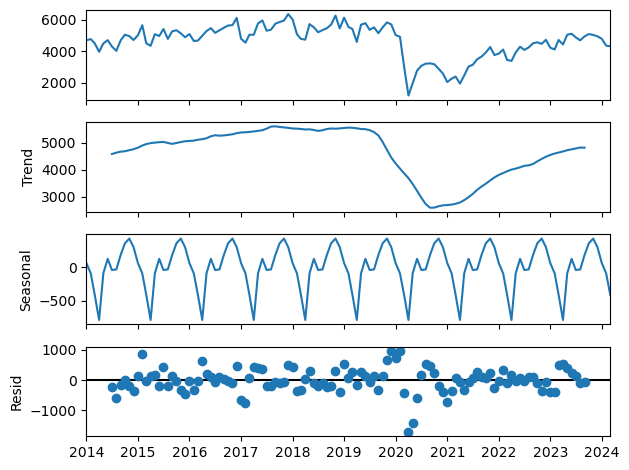

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Traffic_Accidents'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.355987
p-value: 0.154546


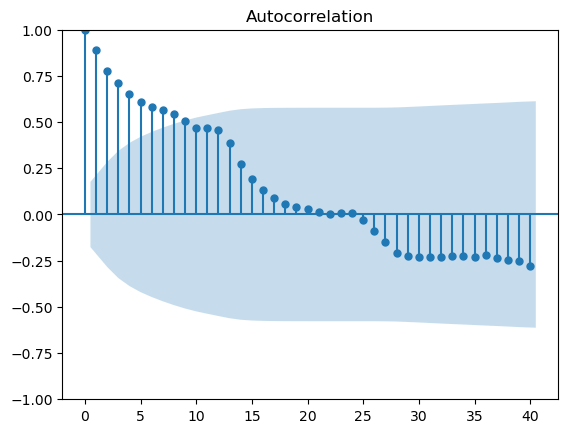

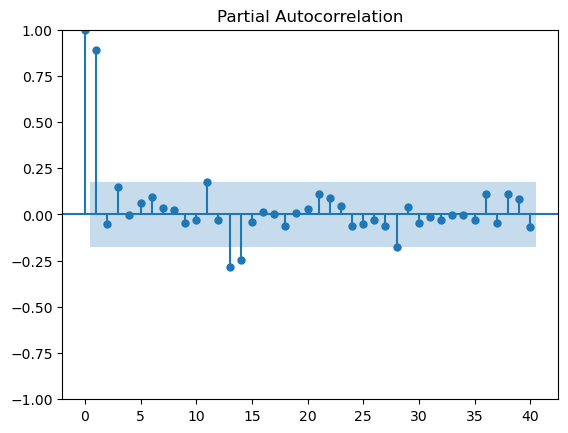

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Traffic_Accidents'], lags=40)
plot_pacf(data['Traffic_Accidents'], lags=40)
plt.show()

In [17]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

arima_model = arimamodel(data)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1860.740, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1860.967, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1862.969, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1862.967, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1858.972, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.338 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -928.486
Date:                Wed, 12 Jun 2024   AIC                           1858.972
Time:                        23:57:06   BIC                           1861.776
Sample:                    01-01-2014   HQIC                          1860.111
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.378e+05   2.04e+04     11.649      0.000    1.98e+05    2.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                48.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.97
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

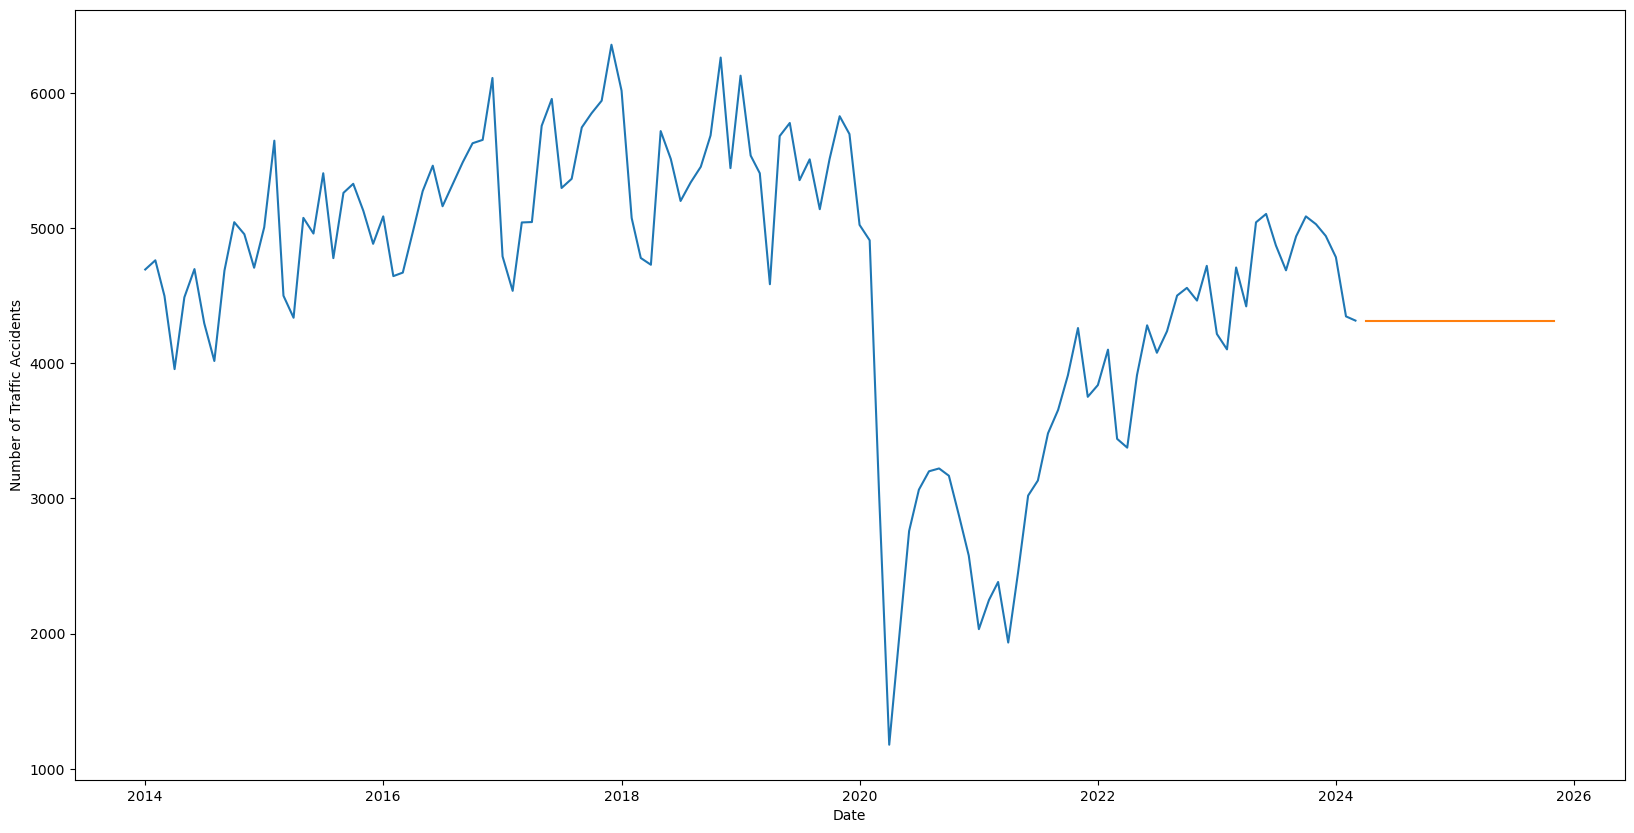

In [18]:
forecasts = arima_model.predict(20)
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Number of Traffic Accidents")
plt.plot(data)
plt.plot(forecasts)